# OutLine : 
1- Some Analysis in International football results from 1872 to 2021   (DataFrames and visualization)


2- Some SQL quiries

3-  Machine Learning(Only preperation the Data for future work of Predicion on Match results )



#DataSet :
 An up-to-date dataset of over 40,000 international football results

Data Source : https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017/code

In [ ]:
pip install pyspark

     |████████████████████████████████| 212.4MB 65kB/s 
     |████████████████████████████████| 204kB 19.5MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=343bc4272c4d699d391107d682cc1fe4e4e6982bd801eab7c8e72c8d924bc740
  Stored in directory: /root/.cache/pip/wheels/40/1b/2c/30f43be2627857ab80062bef1527c0128f7b4070b6b2d02139
Successfully built pyspark


#### Start a simple Spark Session

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("CSCI461_Project").getOrCreate()

#### Load the data .

In [ ]:
data = spark.read.csv("/content/sample_data/results.csv",inferSchema=True,header=True)


## Manipulating data

In [ ]:
data.columns

['date',
 'home_team',
 'away_team',
 'home_score',
 'away_score',
 'tournament',
 'city',
 'country',
 'neutral']

In [ ]:

data.count()

41846

In [ ]:

data.printSchema()

root
 |-- date: string (nullable = true)
 |-- home_team: string (nullable = true)
 |-- away_team: string (nullable = true)
 |-- home_score: integer (nullable = true)
 |-- away_score: integer (nullable = true)
 |-- tournament: string (nullable = true)
 |-- city: string (nullable = true)
 |-- country: string (nullable = true)
 |-- neutral: boolean (nullable = true)



In [ ]:

 data.show(5)


+----------+---------+---------+----------+----------+----------+-------+--------+-------+
|      date|home_team|away_team|home_score|away_score|tournament|   city| country|neutral|
+----------+---------+---------+----------+----------+----------+-------+--------+-------+
|1872-11-30| Scotland|  England|         0|         0|  Friendly|Glasgow|Scotland|  false|
|1873-03-08|  England| Scotland|         4|         2|  Friendly| London| England|  false|
|1874-03-07| Scotland|  England|         2|         1|  Friendly|Glasgow|Scotland|  false|
|1875-03-06|  England| Scotland|         2|         2|  Friendly| London| England|  false|
|1876-03-04| Scotland|  England|         3|         0|  Friendly|Glasgow|Scotland|  false|
+----------+---------+---------+----------+----------+----------+-------+--------+-------+
only showing top 5 rows



In [ ]:

data.describe().show()


+-------+----------+-------------+-------------+------------------+------------------+---------------+-------------------+-----------+
|summary|      date|    home_team|    away_team|        home_score|        away_score|     tournament|               city|    country|
+-------+----------+-------------+-------------+------------------+------------------+---------------+-------------------+-----------+
|  count|     41846|        41846|        41846|             41846|             41846|          41846|              41846|      41846|
|   mean|      null|         null|         null|1.7437031018496392|1.1863738469626726|           null|               null|       null|
| stddev|      null|         null|         null|1.7522238282543958|1.4031992393563006|           null|               null|       null|
|    min|1872-11-30|     Abkhazia|     Abkhazia|                 0|                 0|ABCS Tournament|6th of October City|Afghanistan|
|    max|2020-12-09|Åland Islands|Åland Islands|       

# DataFrame visualization

- Analysis of the increase of countries that play over the years



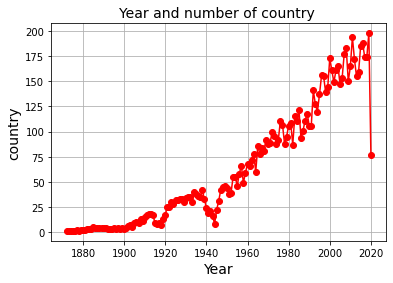

In [ ]:

df = data.toPandas()
df["year"]=pd.to_datetime(df['date']).dt.year
data_c=df[['year','country']]
data_c = data_c.drop_duplicates()
data_c1=data_c.groupby('year').count()

plt.plot(data_c1.index, data_c1['country'], color='red', marker='o')
plt.title('Year and number of country ', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('country', fontsize=14)
plt.grid(True)
plt.show()

- Analysis of Type of Match around Years

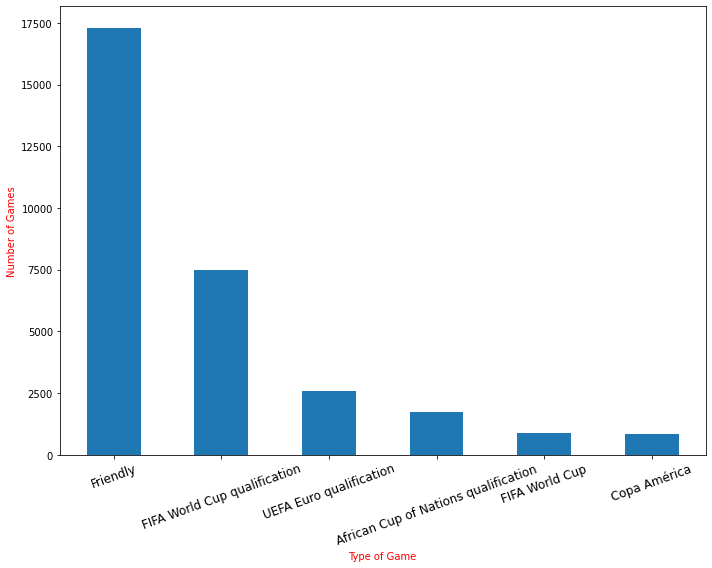

In [ ]:
# Check the column names of names_df
import matplotlib.pyplot as plt
df = data.toPandas()
plt.figure(figsize=(10,8))
type=df['tournament'].value_counts()
ax1=type[0:6].plot(kind='bar')
ax1.set_xlabel('Type of Game',color = 'red')
ax1.set_ylabel('Number of Games',color = 'red')
plt.xticks(fontsize=12,rotation=20)
plt.tight_layout()
plt.show()


- Analysis number of  games around years 

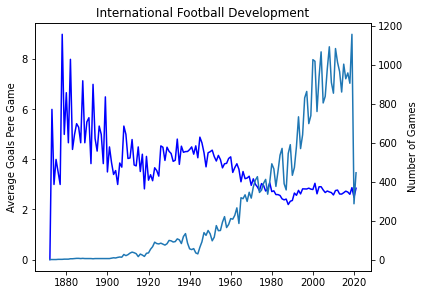

In [ ]:
#fIRST
# Count games around years 
import matplotlib.pyplot as plt
df['year']=pd.DatetimeIndex(df['date']).year
year=df['year'].value_counts().sort_index()

# Average Goals Scores Around years
df['Total Goals ']=df['home_score']+df['away_score']
average = df.groupby(['year']).mean()

## Plot average total gopals around years
fig, ax1 = plt.subplots()
ax1.plot(average.index,average['Total Goals '],color = 'blue')
ax1.set_ylabel('Average Goals Pere Game')

ax2=ax1.twinx()
ax2.plot(year)
ax2.set_ylabel('Number of Games')
plt.tight_layout()
plt.title('International Football Development')
plt.show()

# SQL Queries 

-  Total Type of matches played from  2017 to 2019 without friendly matches 

In [ ]:
data.createOrReplaceTempView("data")

# Construct a query "
query = ''' SELECT  count(*)  from data
WHERE date >= '2017000000'
  AND date < '20191231' AND tournament<>'Friendly' '''

# Assign the result of Spark's query
result = spark.sql(query)

# Print the result
result.show(20)

+--------+
|count(1)|
+--------+
|    1385|
+--------+



- The Total number From 1979 to 2019 of African cup of nation played 

In [ ]:
data.createOrReplaceTempView("data")
# Total number of African cup of nation played from 1979 to 2019
# Construct a query "
query = ''' SELECT count(*) 
from data
WHERE date >= '19790101' AND date < '20191231' AND tournament= 'African Cup of Nations' '''

# Assign the result of Spark's query
result = spark.sql(query)

# Print the result
result.show(20)
  

+--------+
|count(1)|
+--------+
|     566|
+--------+



- Dates  from  2000 to 2019 of all matches and scores of brazil team 

In [ ]:
data.createOrReplaceTempView("data")

# Construct a query "
query = '''SELECT date,SUM(home_score) over (ORDER BY date)from `results_csv`

WHERE date >= '20000000'
  AND date < '20191231' AND home_team='Brazil'  '''

# Assign the result of Spark's query
result = spark.sql(query)

# Print the result
result.show(20)




+----------+----------------------------------------------------------------------------------------------------------------------+
|      date|sum(CAST(home_score AS DOUBLE)) OVER (ORDER BY date ASC NULLS FIRST RANGE BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW)|
+----------+----------------------------------------------------------------------------------------------------------------------+
|2001-04-25|                                                                                                                   1.0|
|2001-05-31|                                                                                                                   3.0|
|2001-07-12|                                                                                                                   3.0|
|2001-07-15|                                                                                                                   5.0|
|2001-07-18|                                                                

- Scores of nigeria goals  wich is  are greather than zero 

In [ ]:
data.createOrReplaceTempView("data")

# Construct a query "
query = '''select count(*) from data  where home_score-away_score>0 and home_team='Nigeria'  '''

# Assign the result of Spark's query
result = spark.sql(query)

# Print the result
result.show(20)






+--------+
|count(1)|
+--------+
|     171|
+--------+



# Machine Learning 
(Only Data  preperation)


- Dropped un needed  Columns 

In [ ]:
dropped = ['date','tournament','city','country','neutral' ]
data = data.select([col for col in data.columns if col not in dropped])
data.show()

+----------------+---------+----------+----------+
|       home_team|away_team|home_score|away_score|
+----------------+---------+----------+----------+
|        Scotland|  England|         0|         0|
|         England| Scotland|         4|         2|
|        Scotland|  England|         2|         1|
|         England| Scotland|         2|         2|
|        Scotland|  England|         3|         0|
|        Scotland|    Wales|         4|         0|
|         England| Scotland|         1|         3|
|           Wales| Scotland|         0|         2|
|        Scotland|  England|         7|         2|
|        Scotland|    Wales|         9|         0|
|         England|    Wales|         2|         1|
|         England| Scotland|         5|         4|
|           Wales| Scotland|         0|         3|
|        Scotland|  England|         5|         4|
|           Wales|  England|         2|         3|
|        Scotland|    Wales|         5|         1|
|         England|    Wales|   

- Add Result Column 

In [ ]:
df = data.toPandas()
import numpy as np 
con=[(df['home_score']==df['away_score']),(df['home_score']>df['away_score']),(df['home_score']<df['away_score'])]
val=[0,1,-1]
df['result']=np.select(con,val)
df.head()


,home_team,away_team,home_score,away_score,result
0,Scotland,England,0,0,0
1,England,Scotland,4,2,1
2,Scotland,England,2,1,1
3,England,Scotland,2,2,0
4,Scotland,England,3,0,1


- Check Datatypes for transformation 

In [ ]:
data.dtypes

[('home_team', 'string'),
 ('away_team', 'string'),
 ('home_score', 'string'),
 ('away_score', 'string')]

- convert scores columns to integer

In [ ]:
data = data.withColumn("home_score", data.home_score.cast("integer"))
data = data.withColumn("away_score", data.away_score.cast("integer"))
data.dtypes

[('home_team', 'string'),
 ('away_team', 'string'),
 ('home_score', 'int'),
 ('away_score', 'int')]

Check categorical variables

In [ ]:
categorical = [item[0] for item in data.dtypes if item[1].startswith('string')] 
categorical

['home_team', 'away_team']

Drop Null values in scores column

In [ ]:
df = data.toPandas()
dropped_null_data = df.dropna(axis=0, subset = ['home_score', 'away_score'], inplace=True)